time step  0
H [[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
dHdX
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
dHdY
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
U
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
dUdX
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
rotV
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
V
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
dVdY
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
rotU
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
dHdT
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
dUdT
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
dVdT
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


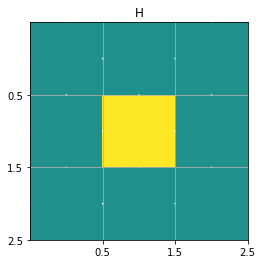

time step  1
H [[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
dHdX
[[-0. -0. -0.  0.]
 [-0. -0. -0.  0.]
 [-0. -0. -0.  0.]]
dHdY
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
U
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
dUdX
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
rotV
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
V
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
dVdY
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
rotU
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
dHdT
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
dUdT
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
dVdT
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Time:  0.0 days
time step  2
H [[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]
dHdX
[[-0. -0. -0.  0.]
 [-0. -0. -0.  0.]
 [-0. -0. -0.  0.]]
dHdY
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
U
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
dUdX
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
rotV
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
V
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
dVdY
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
rotU
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 

In [16]:
"""

The first section of the code contains setup and initialization 
information.  Leave it alone for now, and you can play with them later 
after you get the code filled in and running without bugs.  

"""

# Set up python environment.  numpy and matplotlib will have to be installed
# with the python installation.

import numpy
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import math

# Grid and Variable Initialization -- stuff you might play around with

ncol = 3         # grid size (number of cells)
nrow = ncol

nSlices = 2         # maximum number of frames to show in the plot
ntAnim = 1          # number of time steps for each frame

horizontalWrap = True # determines whether the flow wraps around, connecting
                       # the left and right-hand sides of the grid, or whether
                       # there's a wall there. 
interpolateRotation = True
rotationScheme = "PlusMinus"   # "WithLatitude", "PlusMinus", "Uniform"

# Note: the rotation rate gradient is more intense than the real world, so that
# the model can equilibrate quickly.

windScheme = ""  # "Curled", "Uniform"
initialPerturbation = "Tower"    # "Tower", "NSGradient", "EWGradient"
textOutput = True
plotOutput = True
arrowScale = 30

dT = 600 # seconds
G = 9.8e-4 # m/s2, hacked (low-G) to make it run faster
HBackground = 4000 # meters

dX = 10.E3 # meters, small enough to respond quickly.  This is a very small ocean
# on a very small, low-G planet.  

dxDegrees = dX / 110.e3
flowConst = G  # 1/s2
dragConst = 1.E-6  # about 10 days decay time
meanLatitude = 30 # degrees

# Here's stuff you probably won't need to change

latitude = []
rotConst = []
windU = []
for irow in range(0,nrow):
    if rotationScheme is "WithLatitude":
        latitude.append( meanLatitude + (irow - nrow/2) * dxDegrees )
        rotConst.append( -7.e-5 * math.sin(math.radians(latitude[-1]))) # s-1
    elif rotationScheme is "PlusMinus":
        rotConst.append( -3.5e-5 * (1. - 0.8 * ( irow - (nrow-1)/2 ) / nrow )) # rot 50% +-
    elif rotationScheme is "Uniform":
        rotConst.append( -3.5e-5 ) 
    else:
        rotConst.append( 0 )

    if windScheme is "Curled":
        windU.append( 1e-8 * math.sin( (irow+0.5)/nrow * 2 * 3.14 ) ) 
    elif windScheme is "Uniform":
        windU.append( 1.e-8 )
    else:
        windU.append( 0 )
itGlobal = 0

U = numpy.zeros((nrow, ncol+1))
V = numpy.zeros((nrow+1, ncol))
H = numpy.zeros((nrow, ncol+1))
dUdT = numpy.zeros((nrow, ncol))
dVdT = numpy.zeros((nrow, ncol))
dHdT = numpy.zeros((nrow, ncol))
dHdX = numpy.zeros((nrow, ncol+1))
dHdY = numpy.zeros((nrow, ncol))
dUdX = numpy.zeros((nrow, ncol))
dVdY = numpy.zeros((nrow, ncol))
rotV = numpy.zeros((nrow,ncol)) # interpolated to u locations
rotU = numpy.zeros((nrow,ncol)) #              to v
    
midCell = int(ncol/2)
if initialPerturbation is "Tower":
    H[midCell,midCell] = 1
elif initialPerturbation is "NSGradient":
    H[0:midCell,:] = 0.1
elif initialPerturbation is "EWGradient":
    H[:,0:midCell] = 0.1

"""
This is the work-horse subroutine.  It steps forward in time, taking ntAnim steps of
duration dT.  
"""

def animStep():    

    global stepDump, itGlobal

    # Time Loop
    for it in range(0,ntAnim):

    # Here is where you need to build some code
        for row in range(nrow):
            for col in range(ncol):
                dUdX[row][col]= rotConst[row] * V[row][col] - flowConst * dHdX[row][col] - dragConst* U[row][col] + windU[row]
                dVdT[row][col] = - rotConst[row] * U[row][col] - flowConst * dHdY[row][col] - dragConst * V[row][col]
                dHdX[row][col]= - ( dUdX[row][col] + dVdY[row][col] ) * HBackground / dX
        # Encode Longitudinal Derivatives Here
    
        # Encode Latitudinal Derivatives Here

        # Calculate the Rotational Terms Here

        # Assemble the Time Derivatives Here

        # Step Forward One Time Step
    
        # Update the Boundary and Ghost Cells

#   Now you're done

    itGlobal = itGlobal + ntAnim

def firstFrame():
    global fig, ax, hPlot
    fig, ax = plt.subplots()
    ax.set_title("H")   
    hh = H[:,0:ncol]
    loc = tkr.IndexLocator(base=1, offset=1)
    ax.xaxis.set_major_locator(loc)
    ax.yaxis.set_major_locator(loc)
    grid = ax.grid(which='major', axis='both', linestyle='-')
    hPlot = ax.imshow(hh, interpolation='nearest', clim=(-0.5,0.5))   
    plotArrows()
    plt.show(block=False) 

def plotArrows():
    global quiv, quiv2
    xx = []
    yy = []
    uu = []
    vv = []
    for irow in range( 0, nrow ):
        for icol in range( 0, ncol ):
            xx.append(icol - 0.5)
            yy.append(irow )
            uu.append( U[irow,icol] * arrowScale )
            vv.append( 0 )
    quiv = ax.quiver( xx, yy, uu, vv, color='white', scale=1)
    for irow in range( 0, nrow ):
        for icol in range( 0, ncol ):
            xx.append(icol)
            yy.append(irow - 0.5)
            uu.append( 0 )
            vv.append( -V[irow,icol] * arrowScale )
    quiv2 = ax.quiver( xx, yy, uu, vv, color='white', scale=1)

def updateFrame():
    global fig, ax, hPlot, quiv, quiv2
    hh = H[:,0:ncol]
    hPlot.set_array(hh)
    quiv.remove()    
    quiv2.remove()
    plotArrows()
    plt.pause(0.00001)
    fig.canvas.draw()
    print("Time: ", math.floor( itGlobal * dT / 86400.*10)/10, "days")

def textDump():
    print("time step ", itGlobal)    
    print("H", H)
    print("dHdX" )
    print( dHdX)
    print("dHdY" )
    print( dHdY)
    print("U" )
    print( U)
    print("dUdX" )
    print( dUdX)
    print("rotV" )
    print( rotV)
    print("V" )
    print( V)
    print("dVdY" )
    print( dVdY)
    print("rotU" )
    print( rotU)
    print("dHdT" )
    print( dHdT)
    print("dUdT" )
    print( dUdT)
    print("dVdT" )
    print( dVdT)

if textOutput is True:
    textDump()
if plotOutput is True:
    firstFrame()
for i_anim_step in range(0,nSlices):
    animStep()
    if textOutput is True:
        textDump()
    if plotOutput is True:
        updateFrame()
#print(dHdT[0,1])


In [15]:
dVdT

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])